<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/11_08_2024_more_combined_and_specified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [ ]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [ ]:
data7 = pd.read_excel('/content/consolidated_common_lead_ids (1).xlsx')
df7 = pd.DataFrame(data7)
df7

,lead_id,created_time,Ad Name,campaign_name,form_name,platform,lead_id.1,graduation_degree,graduation_percentage,work_experience,...,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10
0,l:661607916150046,2023-12-07 08:31:00,#6 ( Graphic ) - Master's Degree In 12 Months,CBO - USP Masterclass Cold [ 23rd Nov ] - High...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:661607916150046,others,65.0,no_work_experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,l:1293647514650937,2023-12-06 12:31:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 31st Oct ] - More Volum...,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:1293647514650937,b.tech_it,70.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,l:332007029816868,2024-01-18 14:54:00,#1 ( Graphic ) - Want To Build Your Career In ...,USP Masterclass Cold [ 31st Oct ] - Higher Int...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:332007029816868,others,65.0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,l:1494951434689445,2023-12-01 12:13:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 31st Oct ] - More Volum...,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:1494951434689445,m.tech,70.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,l:752473636818036,2024-01-29 08:34:00,USP_Drexel_3_Getpaid,USP_COOP-Drexel_More_Volume_No Logic_India_240124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:752473636818036,"b.tech_(civil,_eee,_mech._,_etc.)",60.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,l:733737222271914,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall (Dropped),NaN,NaN
4305,l:1547362259166875,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall (Dropped),NaN,NaN
4306,l:1347108042669193,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN
4307,l:430457079653387,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2025,NaN,NaN


In [ ]:
import pandas as pd

# Example DataFrame df7 (Replace this with your actual DataFrame)
# Assuming df7 has columns like ['lead_id', 'column1', 'column2', ...]

# Step 1: Identify duplicated lead_ids in df7
duplicated_lead_ids = df7[df7['lead_id'].duplicated(keep=False)]

# Step 2: Initialize a new DataFrame to store merged rows
merged_df = pd.DataFrame()

# Step 3: Iterate over each unique lead_id with duplicates
for lead_id in duplicated_lead_ids['lead_id'].unique():
    # Filter rows with the current lead_id
    lead_id_rows = df7[df7['lead_id'] == lead_id]

    # Merge the rows by concatenating their respective column information
    merged_row = lead_id_rows.iloc[0]  # Start with the first occurrence
    for _, row in lead_id_rows.iloc[1:].iterrows():
        for col in df7.columns:
            if pd.notna(row[col]) and pd.isna(merged_row[col]):
                merged_row[col] = row[col]
            elif pd.notna(row[col]) and col != 'lead_id':
                merged_row[col] = str(merged_row[col]) + ' | ' + str(row[col])

    # Append the merged row to the new DataFrame
    merged_df = merged_df.append(merged_row, ignore_index=True)

# Step 4: Remove original duplicated rows from df7 and append merged rows
df7_non_duplicates = df7.drop_duplicates(subset='lead_id', keep=False)
final_df = pd.concat([df7_non_duplicates, merged_df], ignore_index=True)

# Step 5: Save the final DataFrame to a new Excel file
final_df.to_excel('final_merged_lead_ids.xlsx', index=False)

# Display the final DataFrame
print(final_df)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import pandas as pd

# Example DataFrame df7 (Replace this with your actual DataFrame)
# Assuming df7 has columns like ['lead_id', 'column1', 'column2', ...]

# Step 1: Identify duplicated lead_ids in df7
duplicated_lead_ids = df7[df7['lead_id'].duplicated(keep=False)]

# Step 2: Initialize a list to store merged rows
merged_rows = []

# Step 3: Iterate over each unique lead_id with duplicates
for lead_id in duplicated_lead_ids['lead_id'].unique():
    # Filter rows with the current lead_id
    lead_id_rows = df7[df7['lead_id'] == lead_id]

    # Merge the rows by concatenating their respective column information
    merged_row = lead_id_rows.iloc[0].copy()  # Start with the first occurrence
    for _, row in lead_id_rows.iloc[1:].iterrows():
        for col in df7.columns:
            if pd.notna(row[col]) and pd.isna(merged_row[col]):
                merged_row[col] = row[col]
            elif pd.notna(row[col]) and col != 'lead_id':
                merged_row[col] = str(merged_row[col]) + ' | ' + str(row[col])

    # Append the merged row to the list
    merged_rows.append(merged_row)

# Step 4: Convert the list of merged rows into a DataFrame
merged_df = pd.DataFrame(merged_rows)

# Step 5: Remove original duplicated rows from df7 and append merged rows
df7_non_duplicates = df7.drop_duplicates(subset='lead_id', keep=False)
final_df = pd.concat([df7_non_duplicates, merged_df], ignore_index=True)

# Step 6: Save the final DataFrame to a new Excel file
final_df.to_excel('final_merged_lead_ids.xlsx', index=False)

# Display the final DataFrame
print(final_df)


                                   lead_id        created_time  \
0                        l:661607916150046 2023-12-07 08:31:00   
1                       l:1293647514650937 2023-12-06 12:31:00   
2                        l:332007029816868 2024-01-18 14:54:00   
3                       l:1494951434689445 2023-12-01 12:13:00   
4                        l:752473636818036 2024-01-29 08:34:00   
..                                     ...                 ...   
93                       l:148440838363433 2024-01-19 10:24:00   
94                      l:1354272388493234 2024-01-14 00:01:00   
95  f83155d7-4eb8-4736-a873-1926990c5f41-3 2024-01-26 16:32:00   
96                       l:315727981454081 2024-01-02 19:55:00   
97                      l:1459340891384916 2024-03-23 01:14:00   

                                              Ad Name  \
0       #6 ( Graphic ) - Master's Degree In 12 Months   
1       #6 ( Graphic ) - Master's Degree In 12 Months   
2   #1 ( Graphic ) - Want To Build Y

In [ ]:
import pandas as pd

# Example DataFrame df7 (Replace this with your actual DataFrame)
# Assuming df7 has columns like ['lead_id', 'column1', 'column2', ...]

# Step 1: Identify duplicated lead_ids in df7
duplicated_lead_ids = df7[df7['lead_id'].duplicated(keep=False)]

# Step 2: Initialize a list to store merged rows
merged_rows = []

# Step 3: Iterate over each unique lead_id with duplicates
for lead_id in duplicated_lead_ids['lead_id'].unique():
    # Filter rows with the current lead_id
    lead_id_rows = df7[df7['lead_id'] == lead_id]

    # Merge the rows by concatenating their respective column information
    merged_row = lead_id_rows.iloc[0].copy()  # Start with the first occurrence
    for _, row in lead_id_rows.iloc[1:].iterrows():
        for col in df7.columns:
            if pd.notna(row[col]):
                existing_values = set(str(merged_row[col]).split(' | ')) if pd.notna(merged_row[col]) else set()
                new_values = set(str(row[col]).split(' | '))
                merged_values = ' | '.join(sorted(existing_values.union(new_values)))
                merged_row[col] = merged_values

    # Append the merged row to the list
    merged_rows.append(merged_row)

# Step 4: Convert the list of merged rows into a DataFrame
merged_df = pd.DataFrame(merged_rows)

# Step 5: Remove original duplicated rows from df7 and append merged rows
df7_non_duplicates = df7.drop_duplicates(subset='lead_id', keep=False)
final_df = pd.concat([df7_non_duplicates, merged_df], ignore_index=True)

# Step 6: Save the final DataFrame to a new Excel file
final_df.to_excel('final_merged_lead_ids(123).xlsx', index=False)

# Display the final DataFrame
print(final_df)


                                   lead_id        created_time  \
0                        l:661607916150046 2023-12-07 08:31:00   
1                       l:1293647514650937 2023-12-06 12:31:00   
2                        l:332007029816868 2024-01-18 14:54:00   
3                       l:1494951434689445 2023-12-01 12:13:00   
4                        l:752473636818036 2024-01-29 08:34:00   
..                                     ...                 ...   
93                       l:148440838363433 2024-01-19 10:24:00   
94                      l:1354272388493234 2024-01-14 00:01:00   
95  f83155d7-4eb8-4736-a873-1926990c5f41-3 2024-01-26 16:32:00   
96                       l:315727981454081 2024-01-02 19:55:00   
97                      l:1459340891384916 2024-03-23 01:14:00   

                                              Ad Name  \
0       #6 ( Graphic ) - Master's Degree In 12 Months   
1       #6 ( Graphic ) - Master's Degree In 12 Months   
2   #1 ( Graphic ) - Want To Build Y

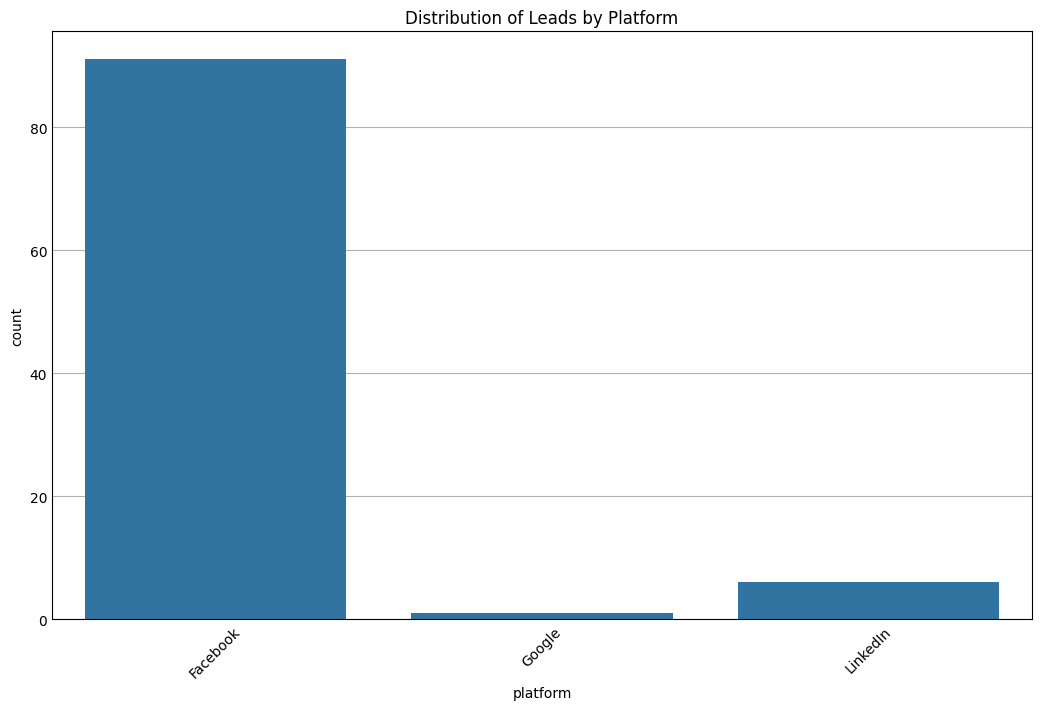

NameError: name 'ax' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df7, x='platform')
plt.title('Distribution of Leads by Platform')
plt.xticks(rotation=45)
plt.show()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

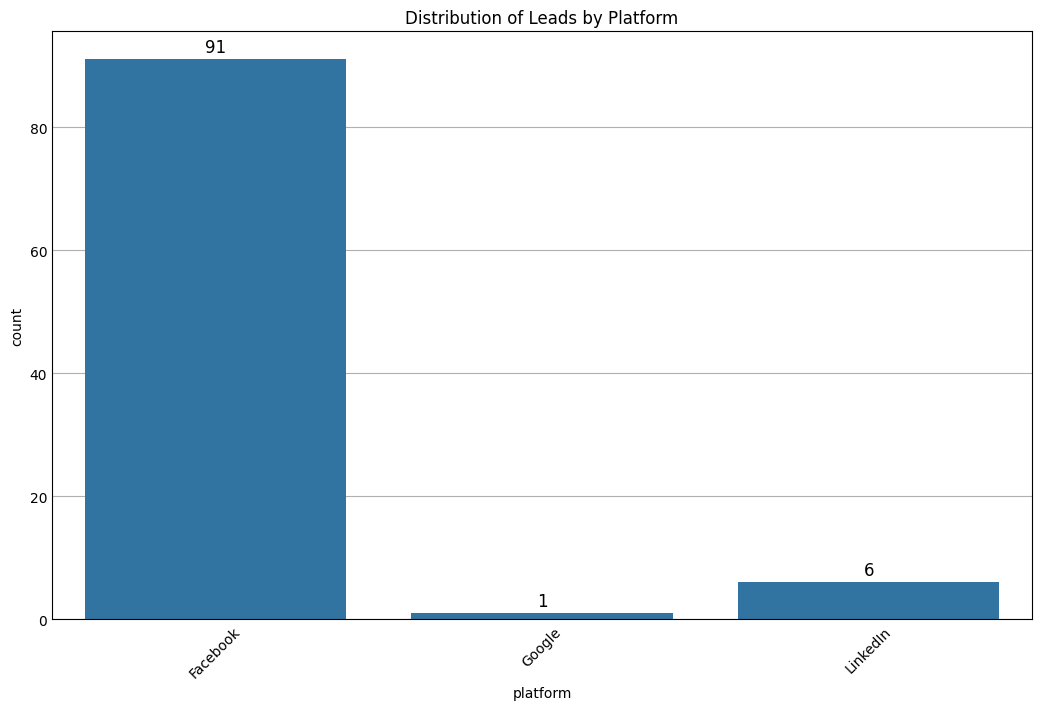

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot and assign it to the variable 'ax'
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df7, x='platform')  # Correctly capturing the plot in 'ax'
plt.title('Distribution of Leads by Platform')
plt.xticks(rotation=45)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


TypeError: 'value' must be an instance of str or bytes, not a int

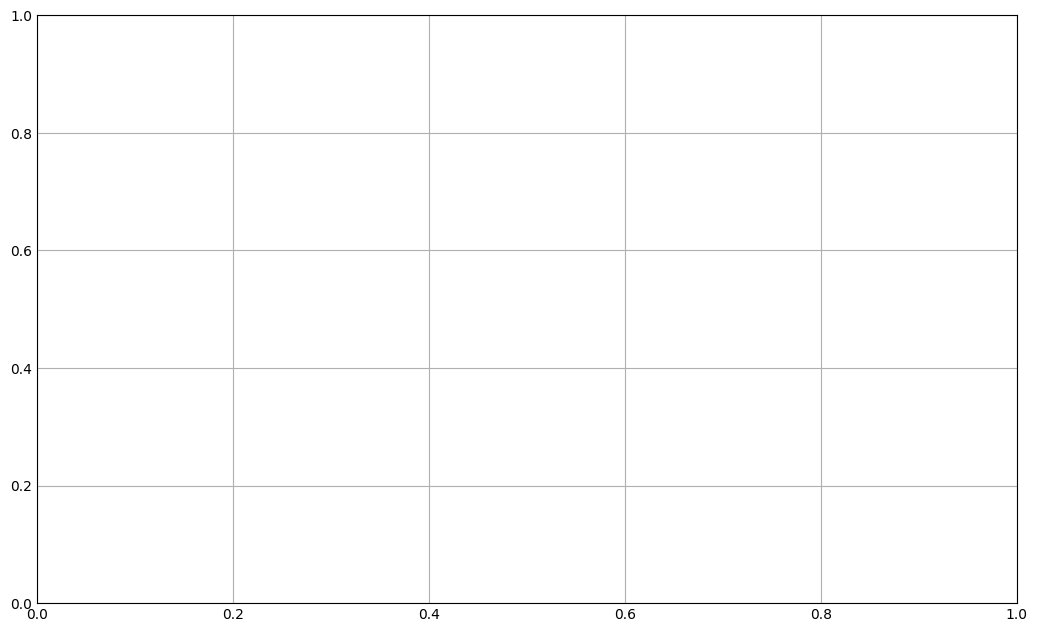

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df7, x='graduation_degree', y='work_experience')
plt.title('Graduation Degree vs. Work Experience')
plt.xticks(rotation=45)
plt.show()

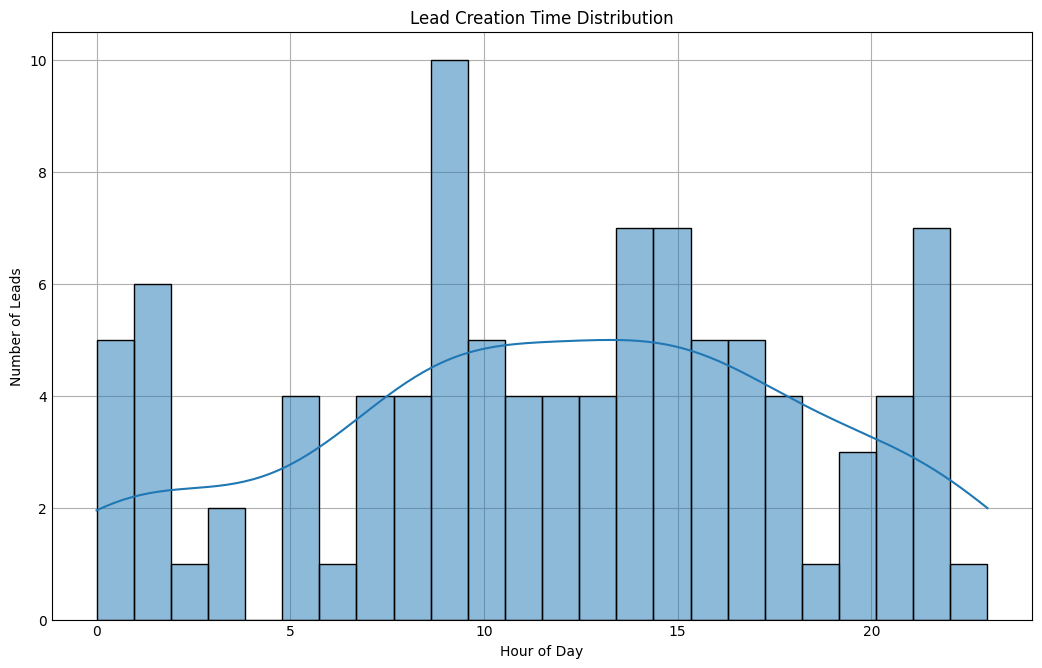

In [ ]:
df7['created_time'] = pd.to_datetime(df7['created_time'])
plt.figure(figsize=(10, 6))
sns.histplot(df7['created_time'].dt.hour, bins=24, kde=True)
plt.title('Lead Creation Time Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Leads')
plt.show()

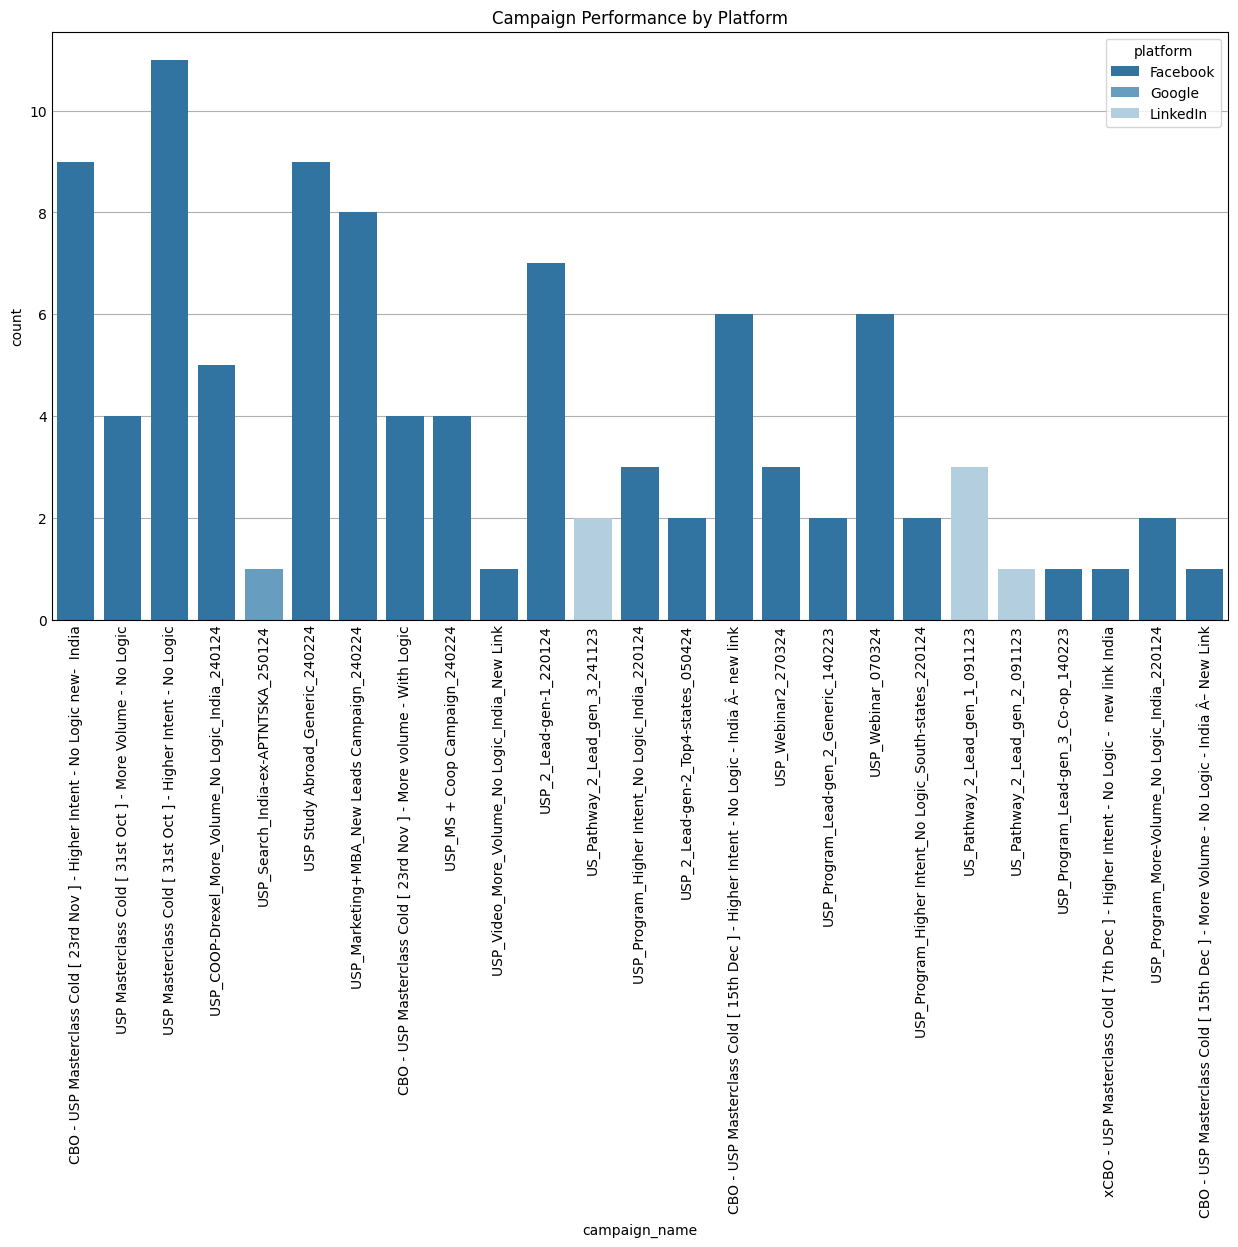

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df7, x='campaign_name', hue='platform')
plt.title('Campaign Performance by Platform')
plt.xticks(rotation=90)
plt.show()

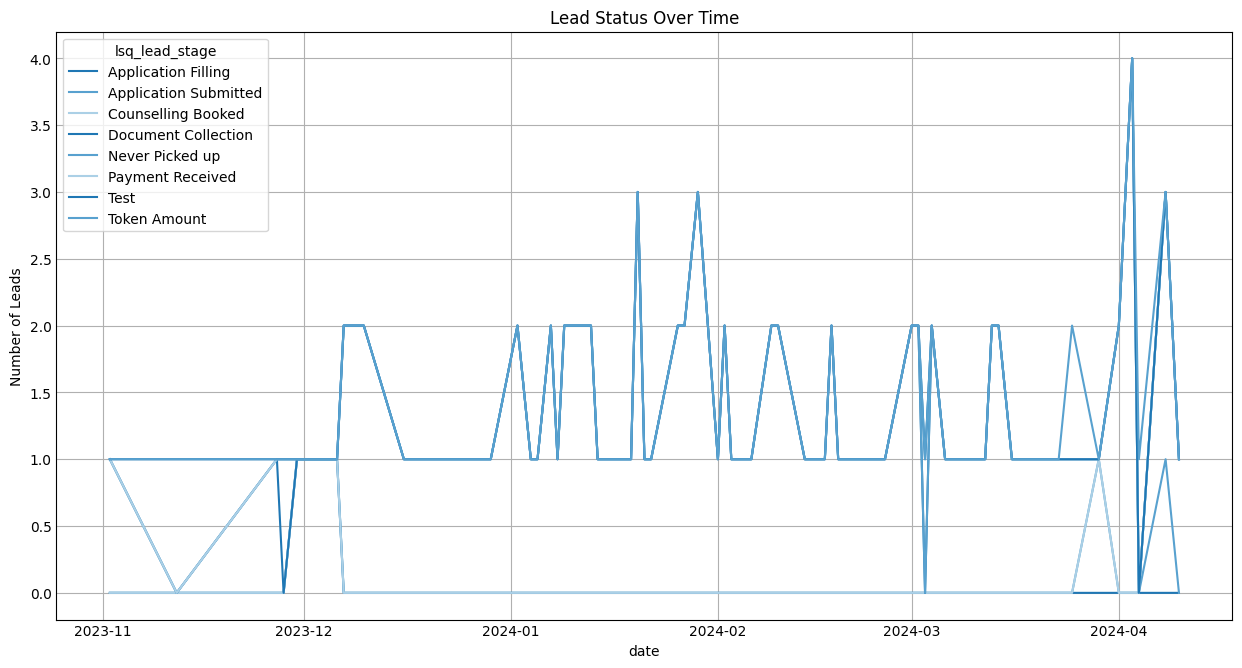

In [ ]:
df7['created_time'] = pd.to_datetime(df7['created_time'])
df7['date'] = df7['created_time'].dt.date

lead_status_time = df7.groupby(['date', 'lsq_lead_stage']).size().unstack().fillna(0)
lead_status_time.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title('Lead Status Over Time')
plt.ylabel('Number of Leads')
plt.show()

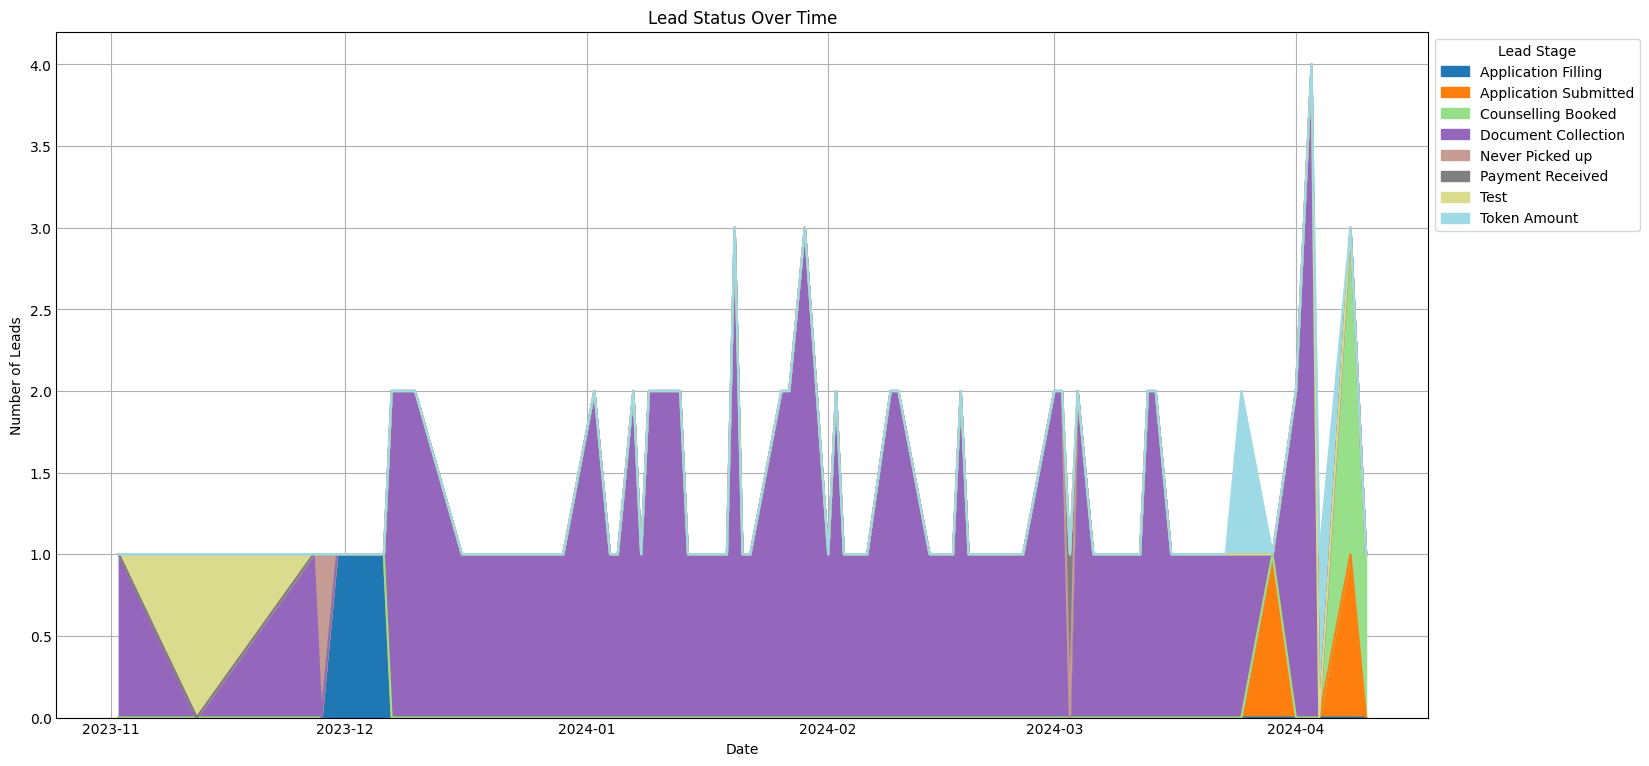

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already converted 'created_time' to datetime and extracted the 'date'
df7['created_time'] = pd.to_datetime(df7['created_time'])
df7['date'] = df7['created_time'].dt.date

# Group by date and lead stage, then unstack and fill missing values
lead_status_time = df7.groupby(['date', 'lsq_lead_stage']).size().unstack().fillna(0)

# Plot the stacked area chart
lead_status_time.plot(kind='area', stacked=True, figsize=(14, 7), cmap='tab20')
plt.title('Lead Status Over Time')
plt.ylabel('Number of Leads')
plt.xlabel('Date')
plt.legend(title='Lead Stage', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


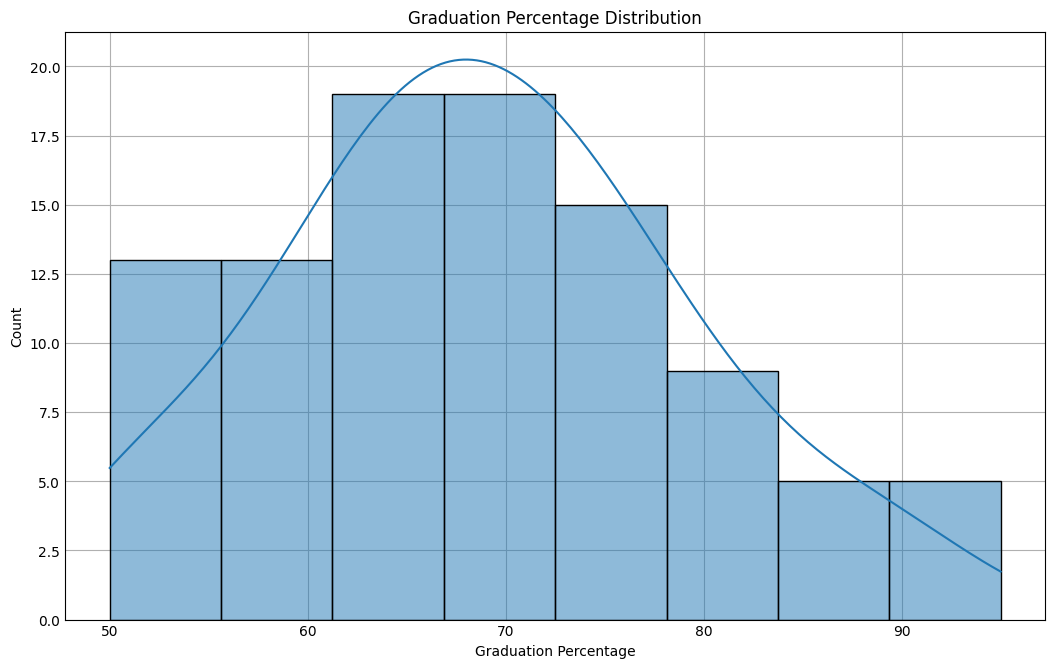

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df7['graduation_percentage'], kde=True)
plt.title('Graduation Percentage Distribution')
plt.xlabel('Graduation Percentage')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df7.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'l:661607916150046'

<Figure size 1200x800 with 0 Axes>

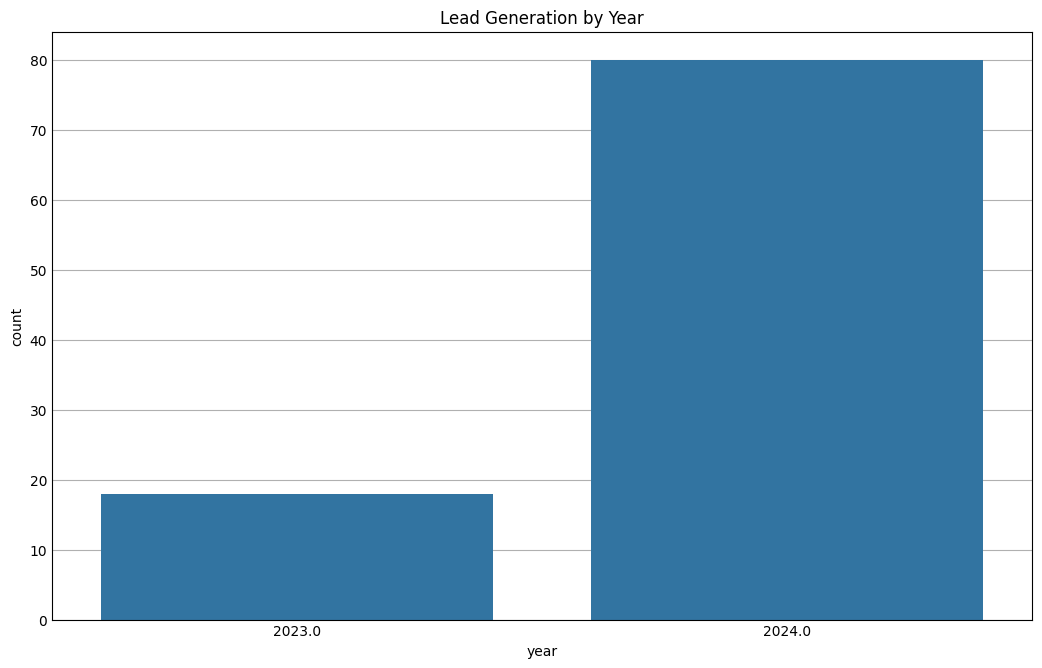

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df7, x='year')
plt.title('Lead Generation by Year')
plt.show()

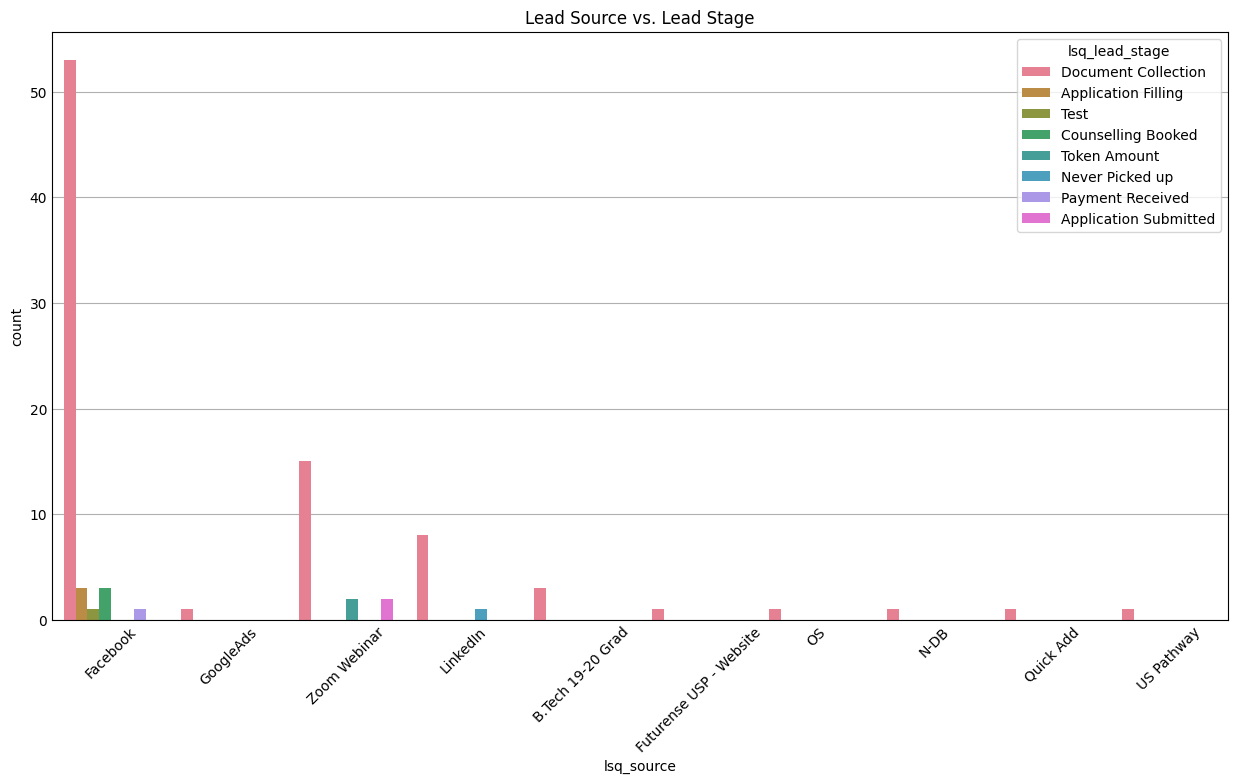

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df7, x='lsq_source', hue='lsq_lead_stage')
plt.title('Lead Source vs. Lead Stage')
plt.xticks(rotation=45)
plt.show()

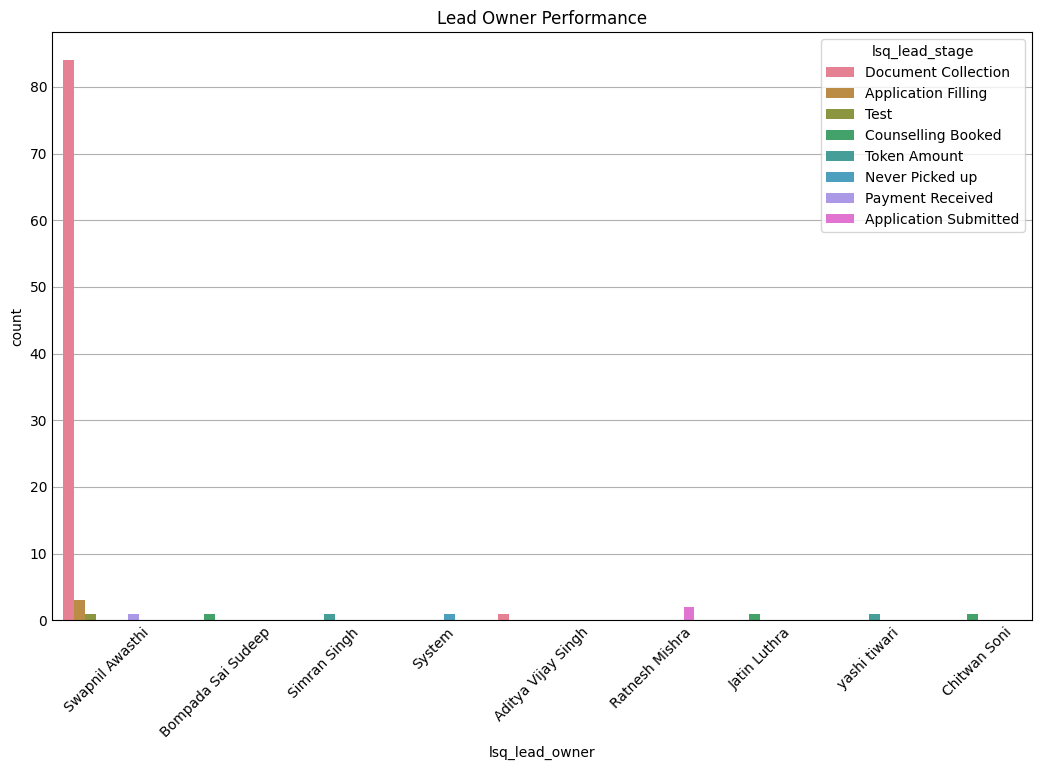

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df7, x='lsq_lead_owner', hue='lsq_lead_stage')
plt.title('Lead Owner Performance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df7[['graduation_percentage', 'work_experience']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df7['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='graduation_percentage', y='work_experience', hue='cluster', palette='viridis')
plt.title('Cluster Analysis on Lead Segmentation')
plt.show()

ValueError: could not convert string to float: 'no_work_experience'

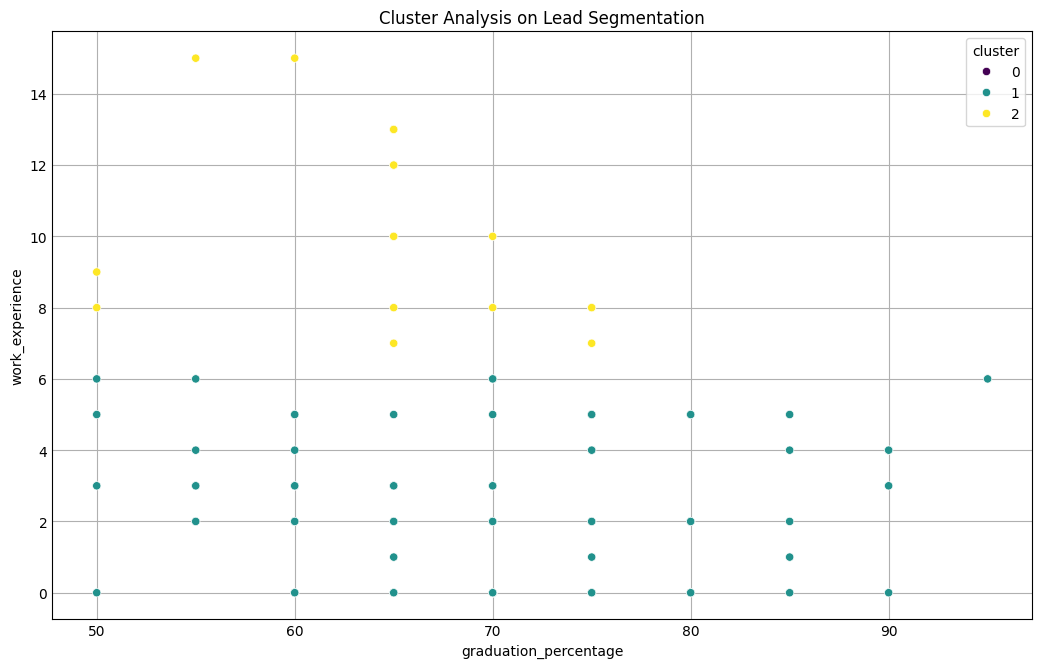

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df7 has columns 'graduation_percentage' and 'work_experience'

# Step 1: Handle non-numeric values in 'work_experience'
# Example: Replace 'no_work_experience' with 0
df7['work_experience'] = df7['work_experience'].replace('no_work_experience', 0)
df7['work_experience'] = pd.to_numeric(df7['work_experience'], errors='coerce')

# Step 2: Select relevant features and handle missing values
X = df7[['graduation_percentage', 'work_experience']].fillna(0)  # or drop NaNs with dropna()

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df7['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='graduation_percentage', y='work_experience', hue='cluster', palette='viridis')
plt.title('Cluster Analysis on Lead Segmentation')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Example: Predict if a lead will be in "Document Collection" stage
X = df7[['graduation_percentage', 'work_experience']]
y = df7['lsq_lead_stage'].apply(lambda x: 1 if x == 'Document Collection' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure data preprocessing is handled:
# - Handle missing or non-numeric values in 'graduation_percentage' and 'work_experience'

# Step 1: Prepare the feature matrix (X) and target vector (y)
X = df7[['graduation_percentage', 'work_experience']]
y = df7['lsq_lead_stage'].apply(lambda x: 1 if x == 'Document Collection' else 0)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Step 5: Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


df7['created_time'] = pd.to_datetime(df7['created_time'])
df7.set_index('created_time', inplace=True)
lead_time_series = df7['lead_id'].resample('D').count()

decomposition = seasonal_decompose(lead_time_series, model='additive', period=30)

decomposition.plot()
plt.show()

KeyError: 'created_time'

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
duration = df7['work_experience']  # Assuming work experience as a proxy for duration
event_observed = df7['lsq_lead_stage'] == 'Dropped'  # Example event: Lead Dropped

kmf.fit(duration, event_observed, label='Lead Survival Curve')
kmf.plot_survival_function()
plt.title('Lead Survival Curve')
plt.show()

ModuleNotFoundError: No module named 'lifelines'

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d0687bd5078e02a5ebc4d4604d2d6ee40ae8f31d64a5a4256159c4c457346e6f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
duration = df7['work_experience']  # Assuming work experience as a proxy for duration
event_observed = df7['lsq_lead_stage'] == 'Dropped'  # Example event: Lead Dropped

kmf.fit(duration, event_observed, label='Lead Survival Curve')
kmf.plot_survival_function()
plt.title('Lead Survival Curve')
plt.show()

TypeError: NaNs were detected in the dataset. Try using pd.isnull to find the problematic values.

In [ ]:
# Group by preferred_college and count the number of lead_ids
college_lead_count = df.groupby('preferred_college')['lead_id'].count().reset_index()
college_lead_count.columns = ['Preferred College', 'Number of Leads']

# Sort the data by the number of leads
college_lead_count = college_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Preferred College', data=college_lead_count, palette='viridis')
plt.title('Number of Leads for Each Preferred College')
plt.xlabel('Number of Leads')
plt.ylabel('Preferred College')
plt.show()


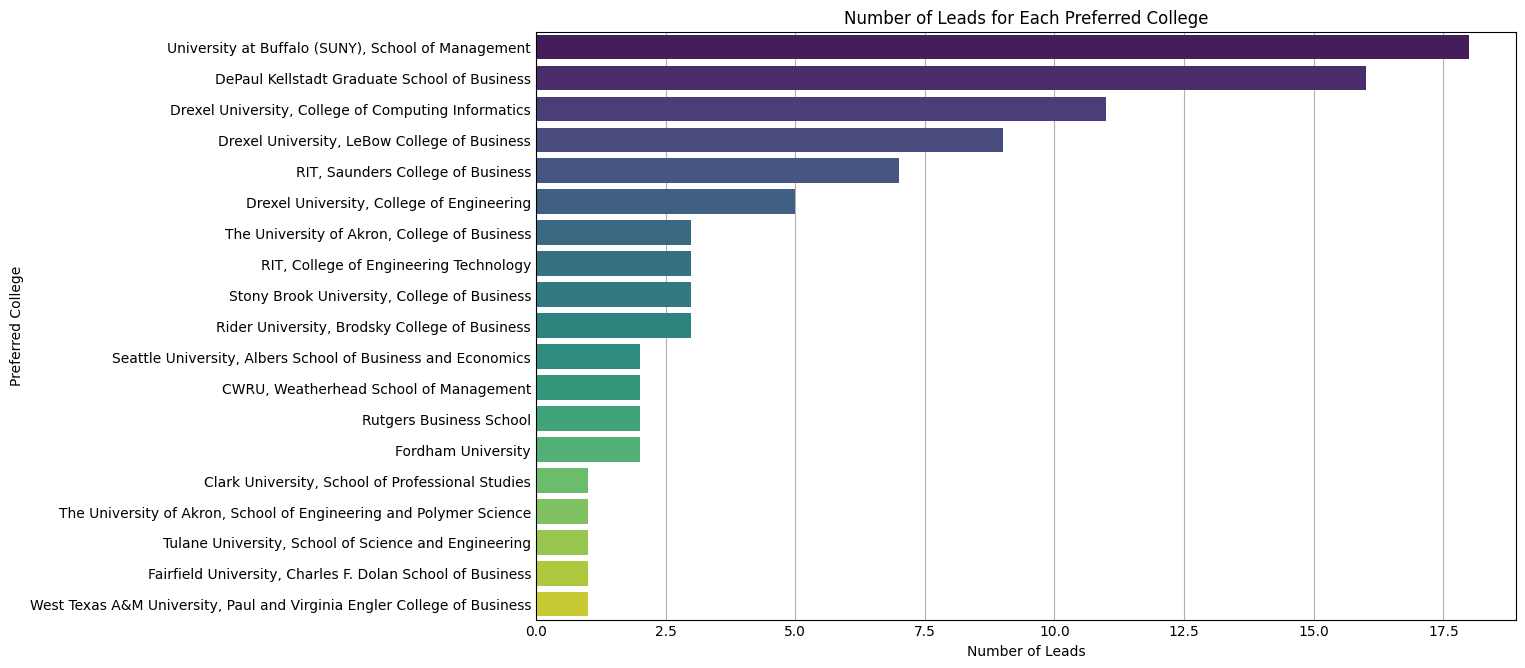

In [ ]:
# Group by 'Candidate Preferred College #1' and count the number of 'lead_id'
college_lead_count = df7.groupby('Candidate Preferred College #1')['lead_id'].count().reset_index()
college_lead_count.columns = ['Preferred College', 'Number of Leads']

# Sort the data by the number of leads
college_lead_count = college_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Preferred College', data=college_lead_count, palette='viridis')
plt.title('Number of Leads for Each Preferred College')
plt.xlabel('Number of Leads')
plt.ylabel('Preferred College')
plt.show()

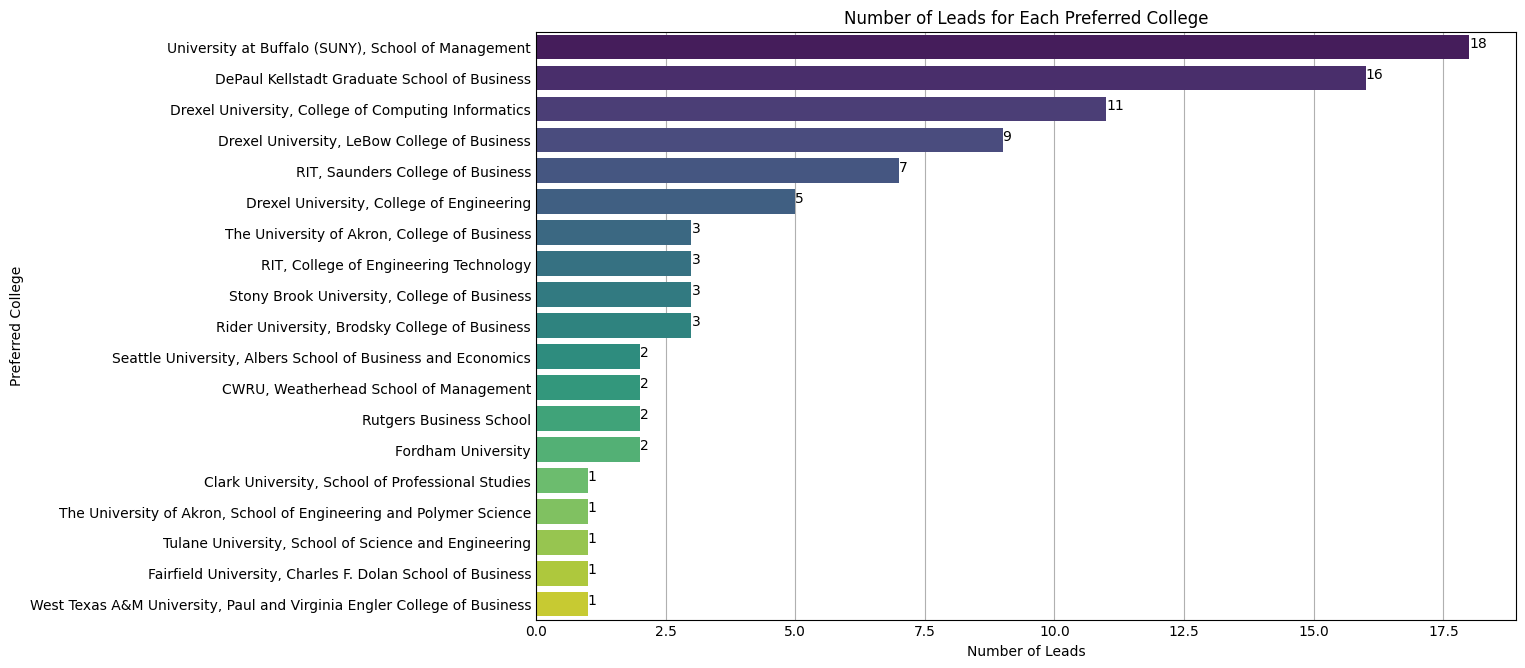

In [ ]:
# Group by 'Candidate Preferred College #1' and count the number of 'lead_id'
college_lead_count = df7.groupby('Candidate Preferred College #1')['lead_id'].count().reset_index()
college_lead_count.columns = ['Preferred College', 'Number of Leads']

# Sort the data by the number of leads
college_lead_count = college_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Preferred College', data=college_lead_count, palette='viridis')

# Add annotations on the bar plot
for index, value in enumerate(college_lead_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads for Each Preferred College')
plt.xlabel('Number of Leads')
plt.ylabel('Preferred College')
plt.show()



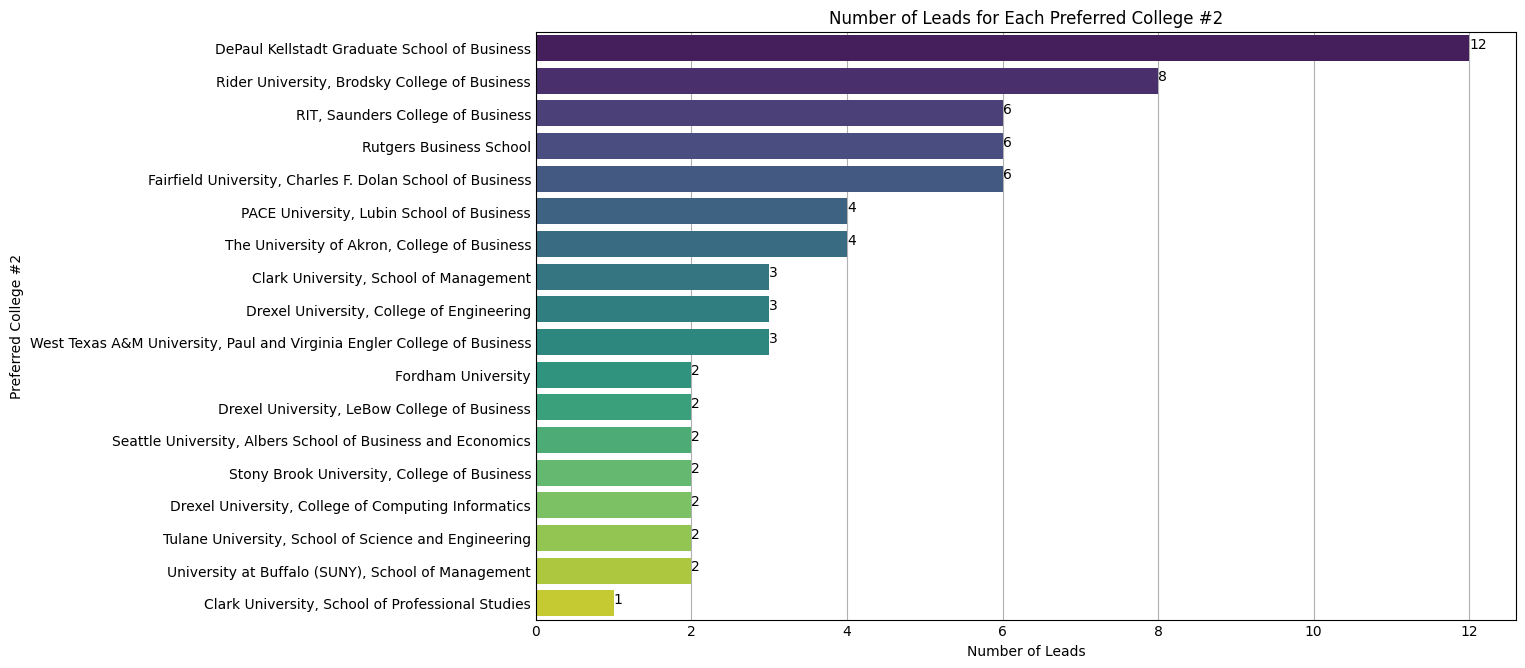

In [ ]:
# Group by 'Candidate Preferred College #2' and count the number of 'lead_id'
college_lead_count = df7.groupby('Candidate Preferred College #2')['lead_id'].count().reset_index()
college_lead_count.columns = ['Preferred College #2', 'Number of Leads']

# Sort the data by the number of leads
college_lead_count = college_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Preferred College #2', data=college_lead_count, palette='viridis')

# Add annotations on the bar plot
for index, value in enumerate(college_lead_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads for Each Preferred College #2')
plt.xlabel('Number of Leads')
plt.ylabel('Preferred College #2')
plt.show()

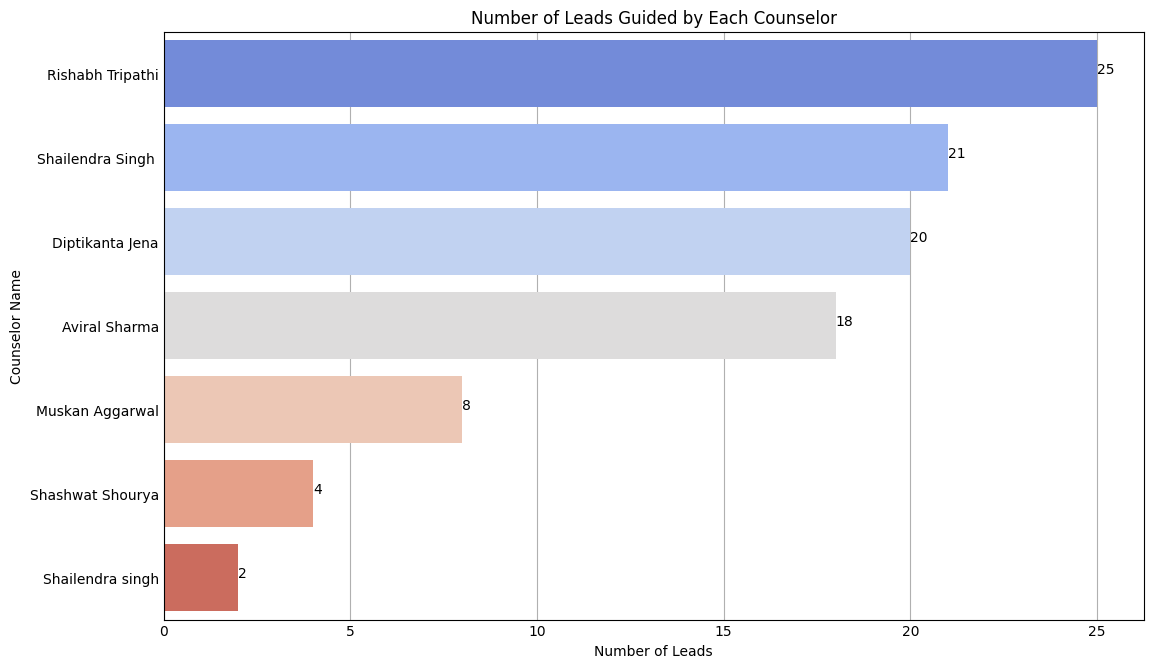

In [ ]:
# Group by 'counselor name' and count the number of 'lead_id'
counselor_lead_count = df7.groupby('Counselor Name')['lead_id'].count().reset_index()
counselor_lead_count.columns = ['Counselor Name', 'Number of Leads']

# Sort the data by the number of leads
counselor_lead_count = counselor_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Counselor Name', data=counselor_lead_count, palette='coolwarm')

# Add annotations on the bar plot
for index, value in enumerate(counselor_lead_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads Guided by Each Counselor')
plt.xlabel('Number of Leads')
plt.ylabel('Counselor Name')
plt.show()

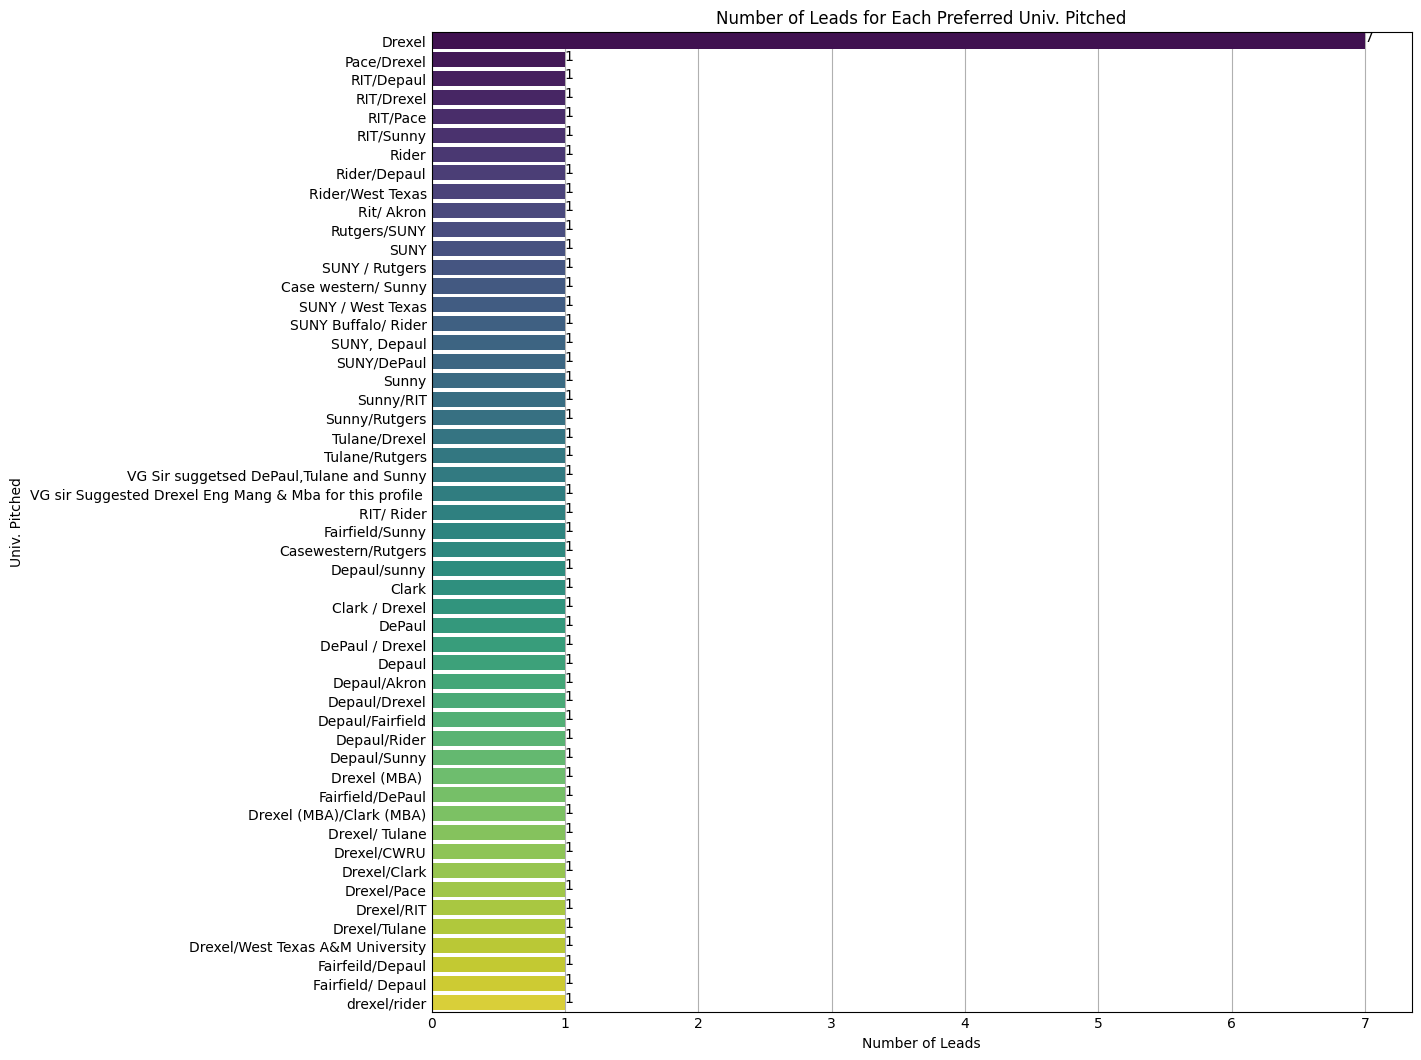

In [ ]:
# Group by 'Univ. Pitched' and count the number of 'lead_id'
college_lead_count = df7.groupby('Univ. Pitched')['lead_id'].count().reset_index()
college_lead_count.columns = ['Univ. Pitched', 'Number of Leads']

# Sort the data by the number of leads
college_lead_count = college_lead_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 10))
sns.barplot(x='Number of Leads', y='Univ. Pitched', data=college_lead_count, palette='viridis')

# Add annotations on the bar plot
for index, value in enumerate(college_lead_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads for Each Preferred Univ. Pitched')
plt.xlabel('Number of Leads')
plt.ylabel('Univ. Pitched')
plt.show()

In [ ]:
data7 = pd.read_excel('/content/consolidated_common_lead_ids (1).xlsx')
df7 = pd.DataFrame(data7)
df7

,lead_id,created_time,Ad Name,campaign_name,form_name,platform,lead_id.1,graduation_degree,graduation_percentage,work_experience,...,Offer Letter Submission Date,.9,Financials Submission,Financials Submission Date,i20 Provisioned,i20 Provisioned Date,Remarks,Status,SOP Status,.10
0,l:661607916150046,2023-12-07 08:31:00,#6 ( Graphic ) - Master's Degree In 12 Months,CBO - USP Masterclass Cold [ 23rd Nov ] - High...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:661607916150046,others,65.0,no_work_experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,l:1293647514650937,2023-12-06 12:31:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 31st Oct ] - More Volum...,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:1293647514650937,b.tech_it,70.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,l:332007029816868,2024-01-18 14:54:00,#1 ( Graphic ) - Want To Build Your Career In ...,USP Masterclass Cold [ 31st Oct ] - Higher Int...,BM - US pathway Webinar Form - Higher Intent -...,Facebook,l:332007029816868,others,65.0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,l:1494951434689445,2023-12-01 12:13:00,#6 ( Graphic ) - Master's Degree In 12 Months,USP Masterclass Cold [ 31st Oct ] - More Volum...,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:1494951434689445,m.tech,70.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,l:752473636818036,2024-01-29 08:34:00,USP_Drexel_3_Getpaid,USP_COOP-Drexel_More_Volume_No Logic_India_240124,BM - US pathway Webinar Form - More Volume - N...,Facebook,l:752473636818036,"b.tech_(civil,_eee,_mech._,_etc.)",60.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,l:733737222271914,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall (Dropped),NaN,NaN
4305,l:1547362259166875,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall (Dropped),NaN,NaN
4306,l:1347108042669193,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN,NaN
4307,l:430457079653387,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2025,NaN,NaN


In [ ]:
# Convert 'UG - CGPA (out of 10)' to a numeric data type with float precision
df7['UG - CGPA (out of 10)'] = pd.to_numeric(df7['UG - CGPA (out of 10)'], errors='coerce').round(5)
# Count the number of leads with CGPA > 6
leads_more_than_6 = df7[df7['UG - CGPA (out of 10)'] > 6]['lead_id'].count()

# Count the number of leads with CGPA <= 6
leads_less_than_or_equal_6 = df7[df7['UG - CGPA (out of 10)'] <= 6]['lead_id'].count()

# Output the counts
print(f"Number of leads with CGPA > 6: {leads_more_than_6}")
print(f"Number of leads with CGPA <= 6: {leads_less_than_or_equal_6}")

Number of leads with CGPA > 6: 72
Number of leads with CGPA <= 6: 13


In [ ]:
# Convert 'Work Exp.' to a numeric data type, setting errors to NaN for non-convertible values
df7['Work Exp.'] = pd.to_numeric(df7['Work Exp.'], errors='coerce')
# Count the number of leads with Work Exp. >= 1
leads_more_or_equal_1 = df7[df7['Work Exp.'] >= 1]['lead_id'].count()

# Count the number of leads with Work Exp. < 1
leads_less_than_1 = df7[df7['Work Exp.'] < 1]['lead_id'].count()

# Output the counts
print(f"Number of leads with Work Exp. >= 1: {leads_more_or_equal_1}")
print(f"Number of leads with Work Exp. < 1: {leads_less_than_1}")

Number of leads with Work Exp. >= 1: 50
Number of leads with Work Exp. < 1: 3


In [ ]:
# Group by 'Highest Education' and count the number of 'lead_id'
education_count = df7.groupby('Highest Education')['lead_id'].count().reset_index()
education_count.columns = ['Highest Education', 'Number of Leads']

# Sort the data by the number of leads
education_count = education_count.sort_values(by='Number of Leads', ascending=False)

# Output the counts
print(education_count)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Leads', y='Higher Education', data=education_count, palette='coolwarm')

# Add annotations on the bar plot
for index, value in enumerate(education_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads for Each Higher Education Level')
plt.xlabel('Number of Leads')
plt.ylabel('Higher Education')
plt.show()

                                    Highest Education  Number of Leads
30                    B.Tech - Mechanical Engineering                3
29                    B.Tech - Information Technology                2
25   B.Tech - Electronics & Communication Engineering                2
22                      B.Tech - Computer Engineering                2
12                      B.E. - Mechanical Engineering                2
39                              Bachelors of Commerce                1
31                              B.Tech - Mechatronics                1
32                    B.Tech - Production Engineering                1
33                                              B.com                1
34                                       BA LLB - LAW                1
35                              BBA - FINANCE GENERAL                1
36                                       BBA- Finance                1
37        BTech Manufacturing Engineering& Technology                1
38  Ba

ValueError: Could not interpret value `Higher Education` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

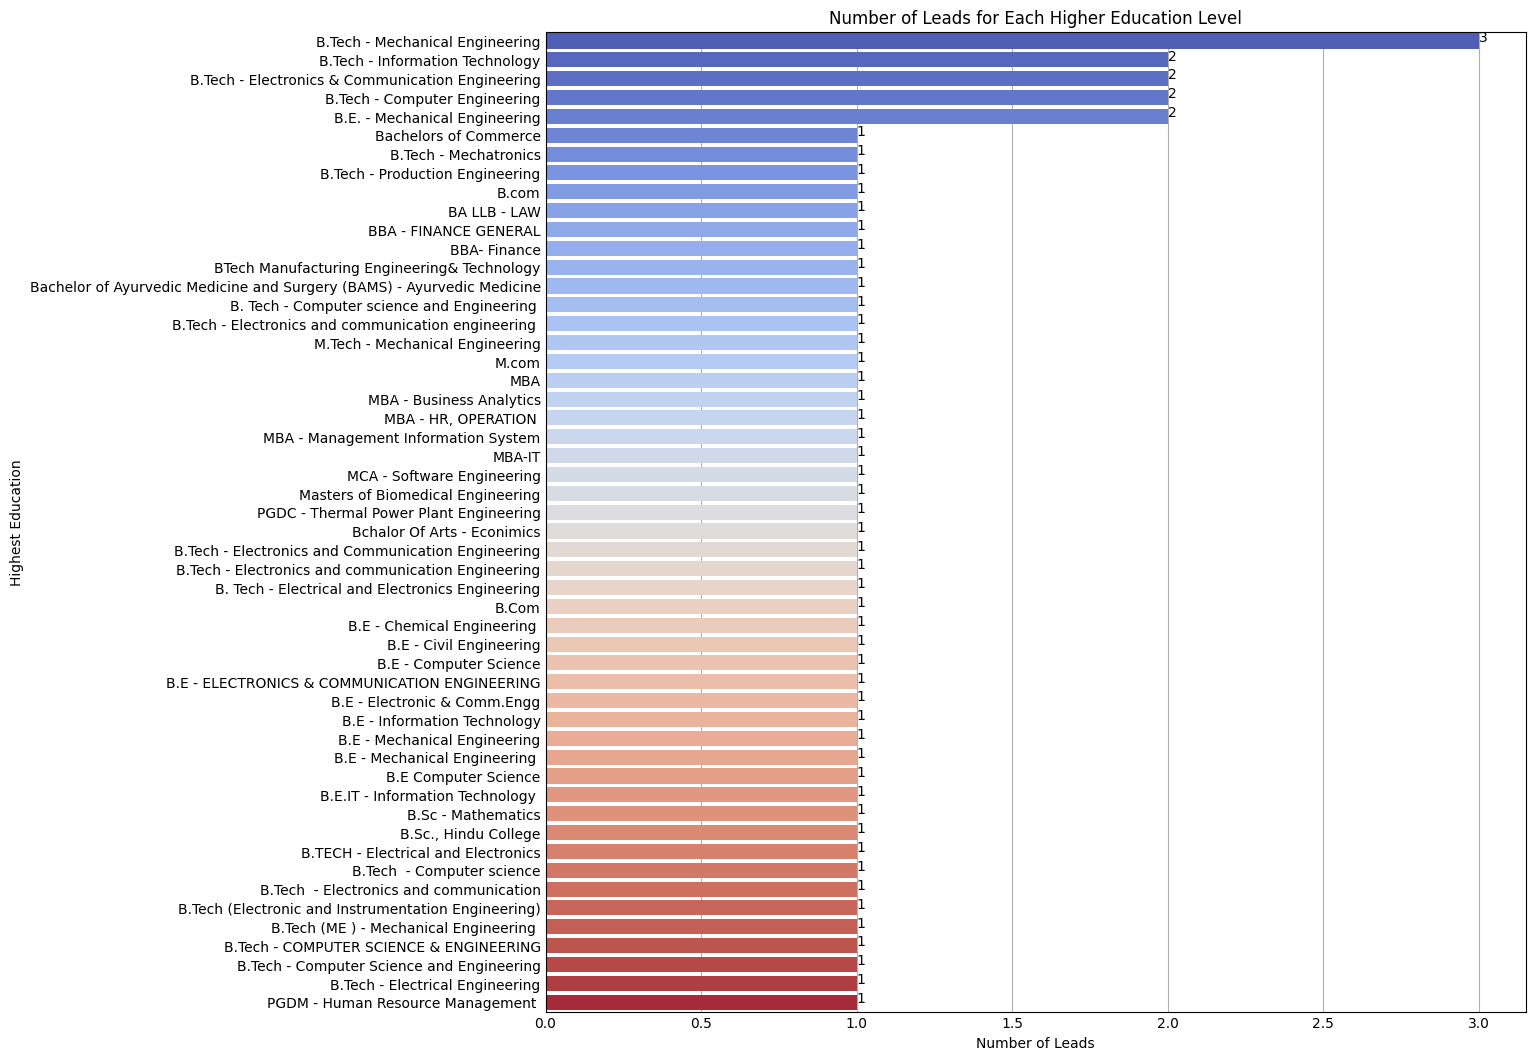

In [ ]:

# Group by 'Highest Education' and count the number of 'lead_id'
education_count = df7.groupby('Highest Education')['lead_id'].count().reset_index()
education_count.columns = ['Highest Education', 'Number of Leads']

# Sort the data by the number of leads
education_count = education_count.sort_values(by='Number of Leads', ascending=False)

# Visualization - Bar Plot with Annotations
plt.figure(figsize=(10, 10))
sns.barplot(x='Number of Leads', y='Highest Education', data=education_count, palette='coolwarm')

# Add annotations on the bar plot
for index, value in enumerate(education_count['Number of Leads']):
    plt.text(value, index, str(value))

plt.title('Number of Leads for Each Higher Education Level')
plt.xlabel('Number of Leads')
plt.ylabel('Highest Education')
plt.show()

In [ ]:
# Convert 'Work Exp.' to numeric, handling non-numeric values
df7['Work Exp.'] = pd.to_numeric(df7['Work Exp.'], errors='coerce').fillna(0)

# Convert 'UG - CGPA (out of 10)' to numeric with proper precision
df7['UG - CGPA (out of 10)'] = pd.to_numeric(df7['UG - CGPA (out of 10)'], errors='coerce').round(5)

# Create a new column to classify leads based on the given conditions
df7['Category'] = df7.apply(lambda x: 'Category 1' if x['Work Exp.'] >= 1 and x['UG - CGPA (out of 10)'] >= 6 else 'Category 2', axis=1)

# Separate the leads into two categories
category_1_leads = df7[df7['Category'] == 'Category 1']
category_2_leads = df7[df7['Category'] == 'Category 2']

# Count the number of leads in each category
category_1_count = category_1_leads['lead_id'].count()
category_2_count = category_2_leads['lead_id'].count()

# Output the counts
print(f"Number of leads in Category 1 (Work Exp. >= 1 and UG - CGPA >= 6): {category_1_count}")
print(f"Number of leads in Category 2 (do not satisfy both conditions): {category_2_count}")

# If you want to see the dataframes
print(category_1_leads.head())  # Display leads in Category 1
print(category_2_leads.head())  # Display leads in Category 2

Number of leads in Category 1 (Work Exp. >= 1 and UG - CGPA >= 6): 37
Number of leads in Category 2 (do not satisfy both conditions): 4272
                 lead_id created_time Ad Name campaign_name form_name  \
4213  l:1494951434689445          NaT     NaN           NaN       NaN   
4215  l:3618905431763515          NaT     NaN           NaN       NaN   
4216   l:661607916150046          NaT     NaN           NaN       NaN   
4217  l:7253036948079799          NaT     NaN           NaN       NaN   
4219  l:2248312195375048          NaT     NaN           NaN       NaN   

     platform lead_id.1 graduation_degree  graduation_percentage  \
4213      NaN       NaN               NaN                    NaN   
4215      NaN       NaN               NaN                    NaN   
4216      NaN       NaN               NaN                    NaN   
4217      NaN       NaN               NaN                    NaN   
4219      NaN       NaN               NaN                    NaN   

     work_exp